In [1]:
#import the libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization


#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.isna().sum().sum() # no missing column

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Univariate analysis
Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

#### Age Analysys

In [7]:
df.groupby('Target').mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


1. Person having term deposit contact duration in longer. 
2. Number of previosus contatcs performed is higher.
3. Balance is higher for customer with Term Deposit

Text(0, 0.5, 'Count')

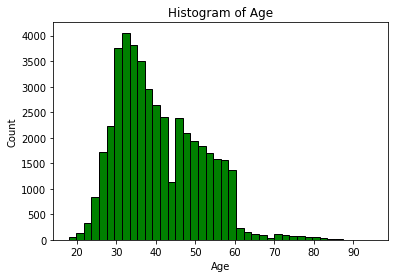

In [8]:
## Freq Distribution for univariate variable 'Age'
plt.hist(df['age'], color='green', edgecolor = 'black', bins = 40) # plots a simple histogram
# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')

### Range of values observed, central values (mean and median), standard deviation and quartiles

In [9]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [10]:
df['age'].isna().sum() # no missing column

0

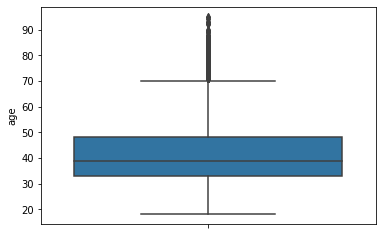

In [11]:
sns.boxplot(y='age', data=df)
plt.show()

### Analysis of the body of distributions / tails, missing values, outliers

The histogram shows its not a normal ditribution. Its skewed towards right.Box plot shows there are outliers. There is no missing values. We can use the column data as is or try removing the outliers.

#### Job categorical value analysis

In [12]:
print(df.job.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


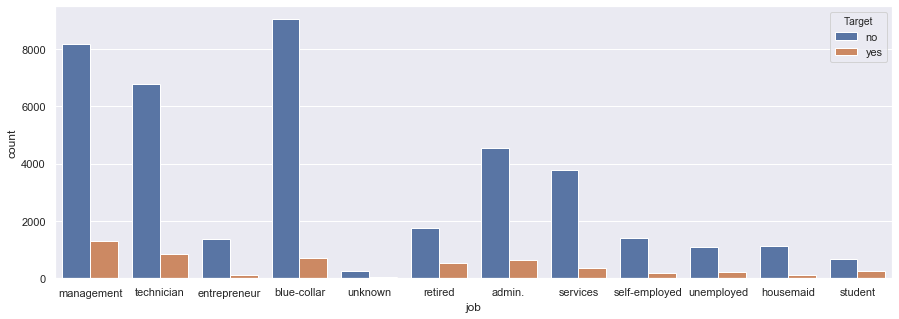

In [13]:
#count plot for job with Target as hue
sns.set(style="darkgrid")
plt.figure(figsize=(15,5)) # makes the plot wider
ax = sns.countplot(x='job',  data=df, hue='Target')

plt.show()

Job title is a good indicator of having Term Deposit. Job title can be a good predictor of the outcome variable.  

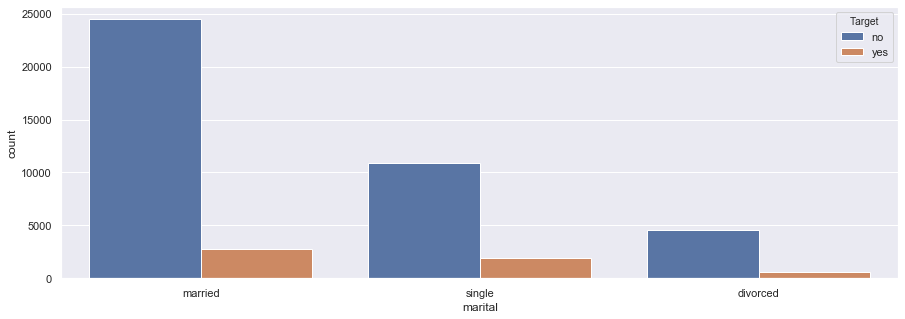

In [14]:
#count plot for marital status with Target as hue
sns.set(style="darkgrid")
plt.figure(figsize=(15,5)) # makes the plot wider
ax = sns.countplot(x='marital',  data=df, hue='Target')

plt.show()

We do not see strong factor having term deposit and marital status (Married/Single). However divorced unlikely to open term deposit.

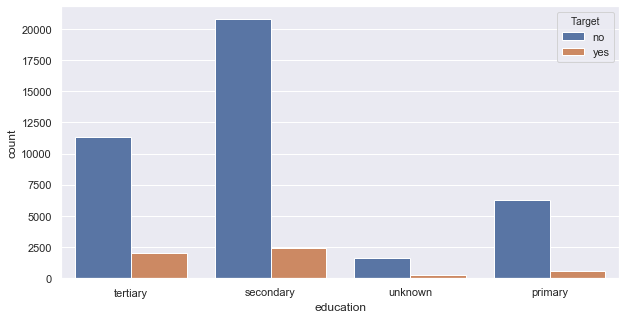

In [15]:
#count plot for job with Target as hue
sns.set(style="darkgrid")
plt.figure(figsize=(10,5)) # makes the plot wider
ax = sns.countplot(x='education',  data=df, hue='Target')

plt.show()

Education has stong impact on accepting term deposit.

Text(0, 0.5, 'TD Frequency of Purchase')

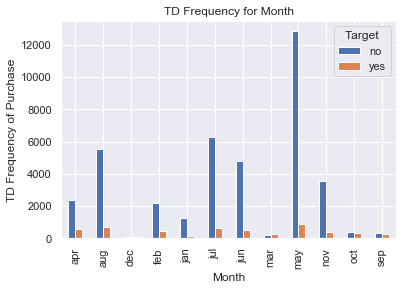

In [16]:
pd.crosstab(df.month,df.Target).plot(kind='bar')
plt.title('TD Frequency for Month')
plt.xlabel('Month')
plt.ylabel('TD Frequency of Purchase')


Month may be a good predictor

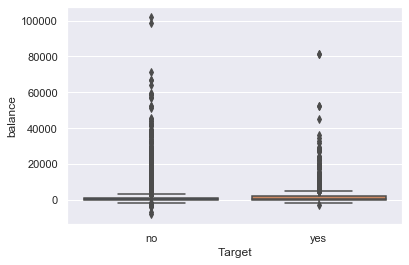

<Figure size 1080x360 with 0 Axes>

In [17]:
sns.boxplot(x='Target', y='balance', data=df)
plt.figure(figsize=(15,5)) # makes the plot wider
plt.show()

In [18]:
### Multivariate analysis

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


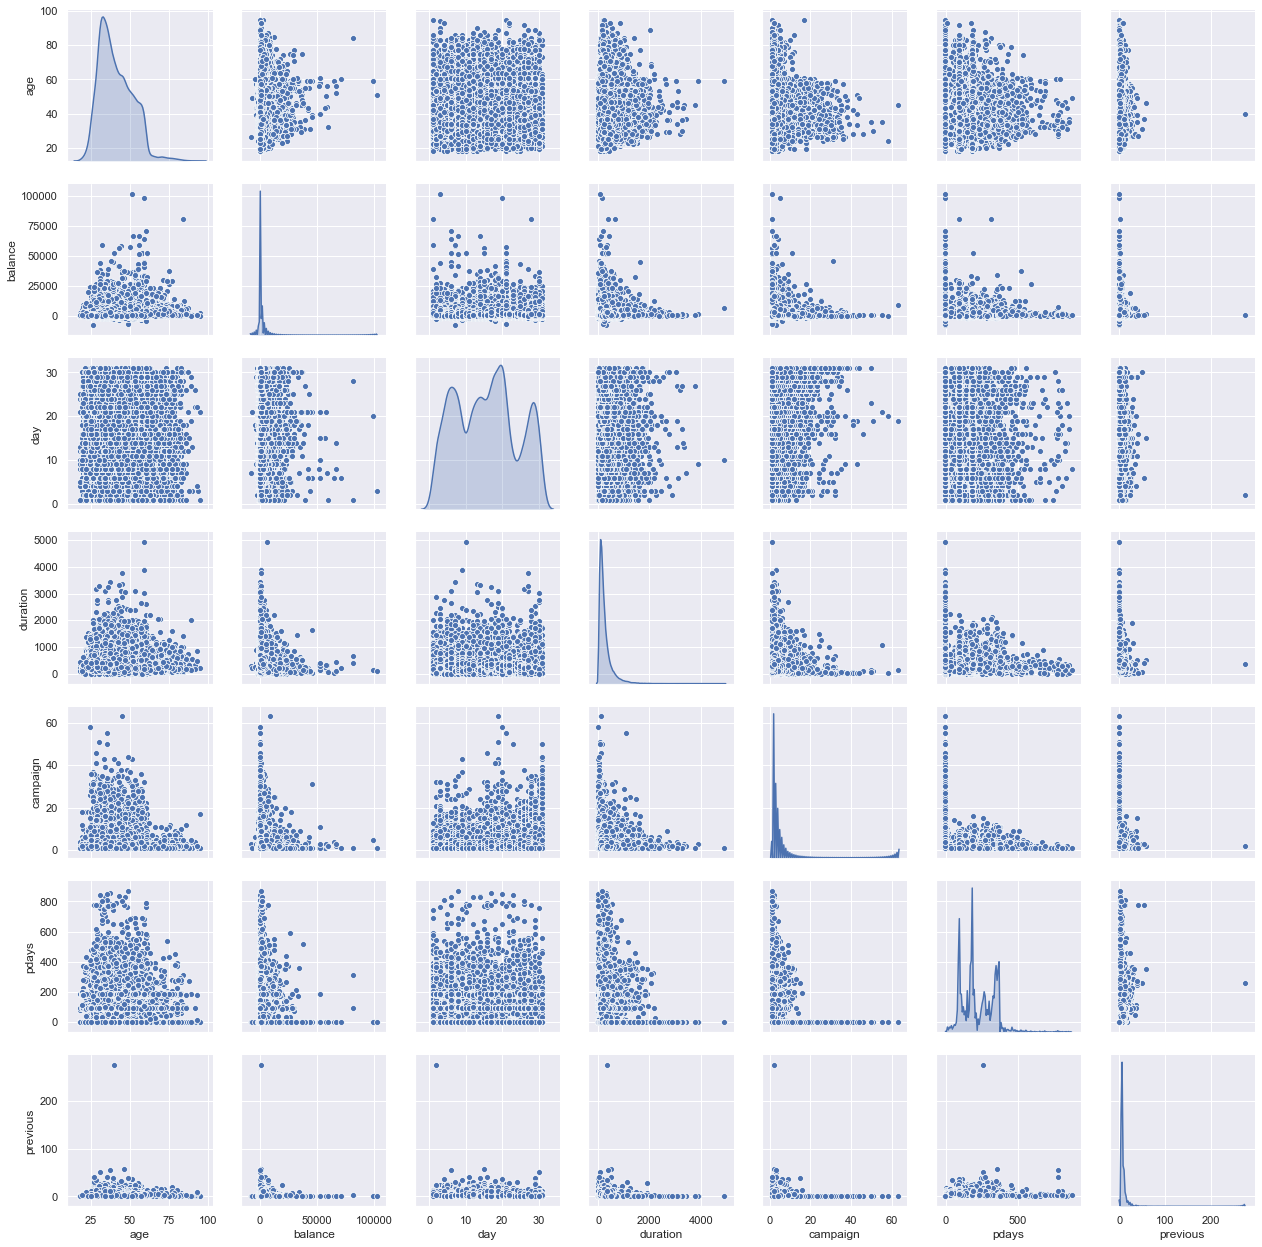

In [20]:
sns.pairplot(df,diag_kind='kde');
plt.show()

In [21]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


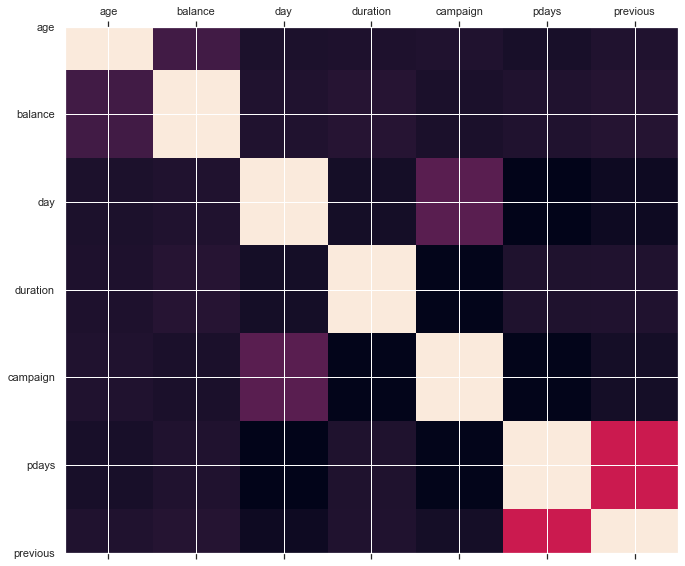

In [22]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)

#### Prepare the data for analytics
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [23]:
df['Target'].replace({'no': 0, 'yes': 1}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [24]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=df[to_keep]
data_final.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
# Class imbalance problem
n_1 = len(data_final.loc[data_final['Target'] == 0])
n_0 = len(df.loc[data_final['Target'] == 1])
print("Number of people does have term deposit: {0} ({1:2.2f}%)".format(n_1, (n_1 / (n_1 + n_0)) * 100 ))
print("Number of people have term deposit: {0} ({1:2.2f}%)".format(n_0, (n_0 / (n_1 + n_0)) * 100))
print("Class imbalance problem. Use SMOTE oversampling \n")

from sklearn.model_selection import train_test_split

## Define X and Y variables

X = data_final.drop(['Target'], axis=1) #Drop the Dependent variable for X columns
Y = data_final[['Target']] # #Drop everything but Dependent variable for Y column

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=123)
x_train.info()

Number of people does have term deposit: 39922 (88.30%)
Number of people have term deposit: 5289 (11.70%)
Class imbalance problem. Use SMOTE oversampling 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 19100 to 15725
Data columns (total 51 columns):
age                    31647 non-null int64
balance                31647 non-null int64
day                    31647 non-null int64
duration               31647 non-null int64
campaign               31647 non-null int64
pdays                  31647 non-null int64
previous               31647 non-null int64
job_admin.             31647 non-null uint8
job_blue-collar        31647 non-null uint8
job_entrepreneur       31647 non-null uint8
job_housemaid          31647 non-null uint8
job_management         31647 non-null uint8
job_retired            31647 non-null uint8
job_self-employed      31647 non-null uint8
job_services           31647 non-null uint8
job_student            31647 non-null uint8
job_technician         3164

In [26]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data_final.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data_final.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [27]:
print("Original target yes Values    : {0} ({1:0.2f}%)".format(len(data_final.loc[data_final['Target'] == 1]), (len(data_final.loc[data_final['Target'] == 1])/len(data_final.index)) * 100))
print("Original target no Values   : {0} ({1:0.2f}%)".format(len(data_final.loc[data_final['Target'] == 0]), (len(data_final.loc[data_final['Target'] == 0])/len(data_final.index)) * 100))
print("")
print("Training target yes Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train['Target'] == 1]), (len(y_train[y_train['Target'] == 1])/len(y_train)) * 100))
print("Training target no Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train['Target'] == 0]), (len(y_train[y_train['Target'] == 0])/len(y_train)) * 100))
print("")
print("Test target yes Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test['Target'] == 1]), (len(y_test[y_test['Target'] == 1])/len(y_test)) * 100))
print("Test target no Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test['Target'] == 0]), (len(y_test[y_test['Target'] == 0])/len(y_test)) * 100))
print("")

Original target yes Values    : 5289 (11.70%)
Original target no Values   : 39922 (88.30%)

Training target yes Values    : 3723 (11.76%)
Training target no Values   : 27924 (88.24%)

Test target yes Values        : 1566 (11.55%)
Test target no Values       : 11998 (88.45%)



In [28]:
!pip install imblearn

In [29]:
#### # Oversample Training data for class imbalance

In [30]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline

In [31]:
smote = SMOTE(random_state=0)
x_train_res, y_train_res=smote.fit_sample(x_train, y_train)
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 27924, 1: 27924}

### Create the Ensemble model
First create models using Logistic Regression and then Decision Tree algorithm.
Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. 
Also reflect the accuracy and F1 score of the model.

In [32]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(solver="newton-cg")
LRmodel.fit(x_train_res, y_train_res)
#predict on test
y_predict_LR = LRmodel.predict(x_test)

In [33]:
model_score = LRmodel.score(x_train_res, y_train_res)
print('Training score ',model_score)
model_score = LRmodel.score(x_test, y_test)
print('Testing score ',model_score)



Training score  0.9434894714224323
Testing score  0.9012090828664111


In [34]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    print(cm)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 94.34894714224323 %

Testing accuracy 90.12090828664111 %

Confusion Matrix
[[11681   317]
 [ 1023   543]]


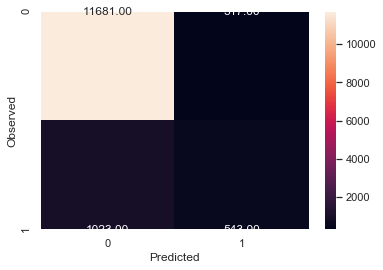

None

Recall: 0.34674329501915707

Precision: 0.6313953488372093

F1 Score: 0.4476504534212695

Roc Auc Score: 0.660161112420397


In [35]:
print("Trainig accuracy",LRmodel.score(x_train_res,y_train_res)*100,'%')  
print()
print("Testing accuracy",LRmodel.score(x_test, y_test)*100,'%')
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict_LR))
print()
print("Recall:",recall_score(y_test,y_predict_LR))
print()
print("Precision:",precision_score(y_test,y_predict_LR))
print()
print("F1 Score:",f1_score(y_test,y_predict_LR))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_LR))


In [36]:
# Add to Dataframe for later comparison of models
DF_Comparison = pd.DataFrame()

dataLR = {'Model':['LogReg'], 'Train Accu':[round(LRmodel.score(x_train_res,y_train_res)*100,2)],'Test Accu':[round(LRmodel.score(x_test, y_test)*100,2)],'Recall':[round(recall_score(y_test,y_predict_LR),2)],'Precision':[round(precision_score(y_test,y_predict_LR),2)],'F1 Score':[round(f1_score(y_test,y_predict_LR),2)],'Roc Auc Score':[round(roc_auc_score(y_test,y_predict_LR),2)]} 
# Create DataFrame 
DF_Comparison = DF_Comparison.append(dataLR,ignore_index=True)


### Using Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [38]:
#predict on test
y_predict_DT = dTree.predict(x_test)

Trainig accuracy 100.0 %

Testing accuracy 87.29725744618106 %

Confusion Matrix
[[11065   933]
 [  790   776]]


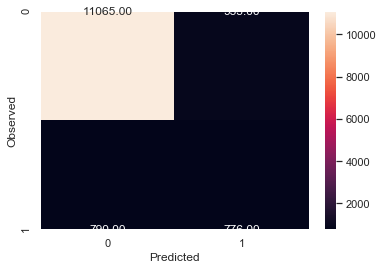

None

Recall: 0.4955300127713921

Precision: 0.45406670567583385

F1 Score: 0.4738931297709924

Roc Auc Score: 0.7088835261389882


In [39]:
print("Trainig accuracy",dTree.score(x_train_res,y_train_res)*100,'%')  
print()
print("Testing accuracy",dTree.score(x_test, y_test)*100,'%')
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict_DT))
print()
print("Recall:",recall_score(y_test,y_predict_DT))
print()
print("Precision:",precision_score(y_test,y_predict_DT))
print()
print("F1 Score:",f1_score(y_test,y_predict_DT))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_DT))

In [40]:
dataDT = {'Model':['DTree'], 'Train Accu':[round(dTree.score(x_train_res,y_train_res)*100,2)],'Test Accu':[round(dTree.score(x_test, y_test)*100,2)],'Recall':[round(recall_score(y_test,y_predict_DT),2)],'Precision':[round(precision_score(y_test,y_predict_DT),2)],'F1 Score':[round(f1_score(y_test,y_predict_DT),2)],'Roc Auc Score':[round(roc_auc_score(y_test,y_predict_DT),2)]} 
DF_Comparison = DF_Comparison.append(dataDT,ignore_index=True)

### Ensemble models

Bagging

In [41]:
from sklearn.ensemble import BaggingClassifier

#bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train_res, y_train_res)


Trainig accuracy 99.98925655350236 %

Testing accuracy 90.17988793866117 %

Confusion Matrix
[[11444   554]
 [  778   788]]


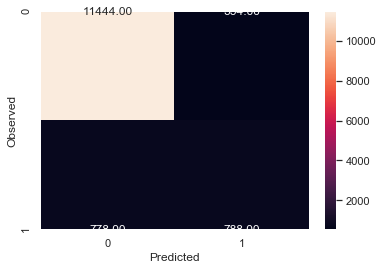

None

Recall: 0.5031928480204342

Precision: 0.587183308494784

F1 Score: 0.5419532324621733

Roc Auc Score: 0.7285092428133509


In [42]:
y_predict_BC = bgcl.predict(x_test)

print("Trainig accuracy",bgcl.score(x_train_res,y_train_res)*100,'%')  
print()
print("Testing accuracy",bgcl.score(x_test, y_test)*100,'%')
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict_BC))
print()
print("Recall:",recall_score(y_test,y_predict_BC))
print()
print("Precision:",precision_score(y_test,y_predict_BC))
print()
print("F1 Score:",f1_score(y_test,y_predict_BC))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_BC))


In [43]:
dataBGCL = {'Model':['Bagging'], 'Train Accu':[round(bgcl.score(x_train_res,y_train_res)*100,2)],'Test Accu':[round(bgcl.score(x_test, y_test)*100,2)],'Recall':[round(recall_score(y_test,y_predict_BC),2)],'Precision':[round(precision_score(y_test,y_predict_BC),2)],'F1 Score':[round(f1_score(y_test,y_predict_BC),2)],'Roc Auc Score':[round(roc_auc_score(y_test,y_predict_BC),2)]} 
DF_Comparison = DF_Comparison.append(dataBGCL,ignore_index=True)

### AdaBoosting

In [44]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train_res, y_train_res)

In [45]:
y_predict_AB = abcl.predict(x_test)

Trainig accuracy 86.76586448932818 %

Testing accuracy 82.5567679150693 %

Confusion Matrix
[[10275  1723]
 [  643   923]]


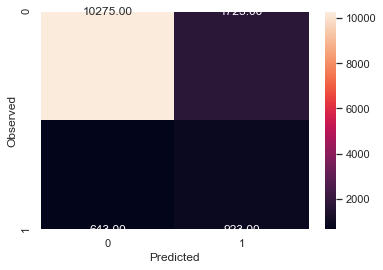

None

Recall: 0.5893997445721584

Precision: 0.3488284202569917

F1 Score: 0.4382716049382716

Roc Auc Score: 0.7228962383470894


In [46]:
print("Trainig accuracy",abcl.score(x_train_res,y_train_res)*100,'%')  
print()
print("Testing accuracy",abcl.score(x_test, y_test)*100,'%')
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict_AB))
print()
print("Recall:",recall_score(y_test,y_predict_AB))
print()
print("Precision:",precision_score(y_test,y_predict_AB))
print()
print("F1 Score:",f1_score(y_test,y_predict_AB))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_AB))

In [47]:
dataBGCL = {'Model':['AdaBoosting'], 'Train Accu':[round(abcl.score(x_train_res,y_train_res)*100,2)],'Test Accu':[round(abcl.score(x_test, y_test)*100,2)],'Recall':[round(recall_score(y_test,y_predict_AB),2)],'Precision':[round(precision_score(y_test,y_predict_AB),2)],'F1 Score':[round(f1_score(y_test,y_predict_AB),2)],'Roc Auc Score':[round(roc_auc_score(y_test,y_predict_AB),2)]} 
DF_Comparison = DF_Comparison.append(dataBGCL,ignore_index=True)

### GradientBoost

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train_res, y_train_res)

In [49]:
y_predict_GB = gbcl.predict(x_test)

Trainig accuracy 93.21730411115887 %

Testing accuracy 89.28044824535534 %

Confusion Matrix
[[11117   881]
 [  573   993]]


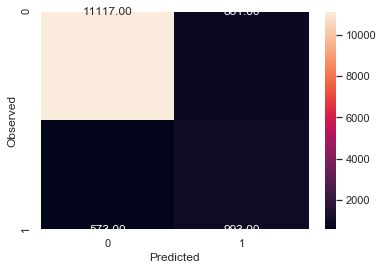

None

Recall: 0.6340996168582376

Precision: 0.5298826040554963

F1 Score: 0.5773255813953488

Roc Auc Score: 0.7803353560203841


In [50]:
print("Trainig accuracy",gbcl.score(x_train_res,y_train_res)*100,'%')  
print()
print("Testing accuracy",gbcl.score(x_test, y_test)*100,'%')
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict_GB))
print()
print("Recall:",recall_score(y_test,y_predict_GB))
print()
print("Precision:",precision_score(y_test,y_predict_GB))
print()
print("F1 Score:",f1_score(y_test,y_predict_GB))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_GB))

In [51]:
dataBGCL = {'Model':['GrBoosting'], 'Train Accu':[round(gbcl.score(x_train_res,y_train_res)*100,2)],'Test Accu':[round(gbcl.score(x_test, y_test)*100,2)],'Recall':[round(recall_score(y_test,y_predict_GB),2)],'Precision':[round(precision_score(y_test,y_predict_GB),2)],'F1 Score':[round(f1_score(y_test,y_predict_GB),2)],'Roc Auc Score':[round(roc_auc_score(y_test,y_predict_GB),2)]} 
DF_Comparison = DF_Comparison.append(dataBGCL,ignore_index=True)

### RandomForest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train_res, y_train_res)

In [53]:
y_predict_RF = rfcl.predict(x_test)

Trainig accuracy 99.99641885116746 %

Testing accuracy 90.61486287230906 %

Confusion Matrix
[[11550   448]
 [  825   741]]


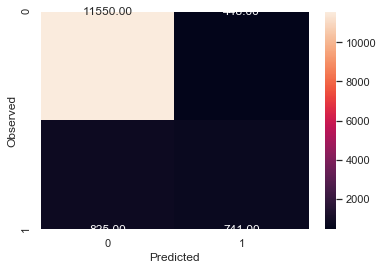

None

Recall: 0.4731800766283525

Precision: 0.6232127838519764

F1 Score: 0.5379310344827586

Roc Auc Score: 0.7179202600177935


In [54]:
print("Trainig accuracy",rfcl.score(x_train_res,y_train_res)*100,'%')  
print()
print("Testing accuracy",rfcl.score(x_test, y_test)*100,'%')
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict_RF))
print()
print("Recall:",recall_score(y_test,y_predict_RF))
print()
print("Precision:",precision_score(y_test,y_predict_RF))
print()
print("F1 Score:",f1_score(y_test,y_predict_RF))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_RF))

In [55]:
dataRFCL = {'Model':['RanForest'], 'Train Accu':[round(rfcl.score(x_train_res,y_train_res)*100,2)],'Test Accu':[round(rfcl.score(x_test, y_test)*100,2)],'Recall':[round(recall_score(y_test,y_predict_RF),2)],'Precision':[round(precision_score(y_test,y_predict_RF),2)],'F1 Score':[round(f1_score(y_test,y_predict_RF),2)],'Roc Auc Score':[round(roc_auc_score(y_test,y_predict_RF),2)]} 
DF_Comparison = DF_Comparison.append(dataRFCL,ignore_index=True)

In [56]:
DF_Comparison = DF_Comparison[['Model','Train Accu','Test Accu','Recall','Precision','F1 Score','Roc Auc Score']]
print('Model Comparison \n')
print(DF_Comparison)

Model Comparison 

           Model Train Accu Test Accu  Recall Precision F1 Score Roc Auc Score
0       [LogReg]    [94.35]   [90.12]  [0.35]    [0.63]   [0.45]        [0.66]
1        [DTree]    [100.0]    [87.3]   [0.5]    [0.45]   [0.47]        [0.71]
2      [Bagging]    [99.99]   [90.18]   [0.5]    [0.59]   [0.54]        [0.73]
3  [AdaBoosting]    [86.77]   [82.56]  [0.59]    [0.35]   [0.44]        [0.72]
4   [GrBoosting]    [93.22]   [89.28]  [0.63]    [0.53]   [0.58]        [0.78]
5    [RanForest]    [100.0]   [90.61]  [0.47]    [0.62]   [0.54]        [0.72]


RandomForest has highest Test Accuracy slightly better than Bagging. Recall is what i would give more preference because i don't want to miss pottential candidate. Aslo, high ROC AUC score.Hence will choose GrBoosting.

Note: There is lot of model tuning options that could increase the performance but its outside the scope of this project.